In [1]:
import pandas as pd

df = pd.read_csv('/Users/manasvi/Github/AskLytics-Data-Analyst-Tool/Finance_data.csv')
df

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet
5,Female,24,No,7,5,4,6,3,1,2,...,1-3 years,Daily,30%-40%,Mutual Fund,Retirement Plan,Liquidity,Fund Diversification,Safe Investment,Risk Free,Internet
6,Female,27,Yes,3,6,4,2,5,1,7,...,3-5 years,Monthly,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,High Interest Rates,Financial Consultants
7,Male,21,Yes,2,3,7,4,6,1,5,...,3-5 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Newspapers and Magazines
8,Male,35,Yes,2,4,7,5,3,1,6,...,1-3 years,Weekly,20%-30%,Equity,Retirement Plan,Capital Appreciation,Fund Diversification,Safe Investment,Fixed Returns,Television
9,Male,31,Yes,1,3,7,4,5,2,6,...,3-5 years,Monthly,30%-40%,Fixed Deposits,Retirement Plan,Capital Appreciation,Fund Diversification,Assured Returns,Fixed Returns,Newspapers and Magazines


In [2]:
df_age_greater_30 = df[df['age'] >30]
df_age_greater_30


,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
8,Male,35,Yes,2,4,7,5,3,1,6,...,1-3 years,Weekly,20%-30%,Equity,Retirement Plan,Capital Appreciation,Fund Diversification,Safe Investment,Fixed Returns,Television
9,Male,31,Yes,1,3,7,4,5,2,6,...,3-5 years,Monthly,30%-40%,Fixed Deposits,Retirement Plan,Capital Appreciation,Fund Diversification,Assured Returns,Fixed Returns,Newspapers and Magazines
10,Female,35,Yes,2,4,7,5,3,1,6,...,3-5 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Financial Consultants
25,Female,32,Yes,3,4,7,5,1,2,6,...,3-5 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Fixed Returns,Financial Consultants
27,Male,31,Yes,2,3,7,6,4,1,5,...,1-3 years,Monthly,20%-30%,Fixed Deposits,Health Care,Capital Appreciation,Fund Diversification,Safe Investment,Fixed Returns,Television
29,Female,34,Yes,5,4,3,2,7,1,6,...,3-5 years,Monthly,10%-20%,Mutual Fund,Retirement Plan,Capital Appreciation,Tax Benefits,Safe Investment,Fixed Returns,Newspapers and Magazines
31,Female,31,Yes,2,4,7,6,3,1,5,...,3-5 years,Monthly,20%-30%,Fixed Deposits,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Fixed Returns,Financial Consultants
38,Male,31,Yes,2,4,7,5,3,1,6,...,1-3 years,Weekly,20%-30%,Equity,Health Care,Dividend,Fund Diversification,Assured Returns,Fixed Returns,Newspapers and Magazines


In [3]:
from langchain_community.llms import Ollama

llm = Ollama(model="llama3.1")


/var/folders/gz/_06zqnfd5hb8j46f9jktvrmh0000gn/T/ipykernel_955/529195970.py:3: LangChainDeprecationWarning: The class `Ollama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaLLM``.
  llm = Ollama(model="llama3.1")


### matplotlib

Python (Pandas) Code:
 import pandas as pd

df_filtered = df[(df['age'] > 30) & (df['gender'] == 'Female')]

SQL Query:
 SELECT *
FROM table_name
WHERE age > 30 AND gender = 'Female';

Matplotlib Code:
 import matplotlib.pyplot as plt
import numpy as np

filtered_df = df[(df['age'] > 30) & (df['gender'] == 'Female')]

plt.figure(figsize=(10,6))
plt.bar(filtered_df['Avenue'], filtered_df['Expect'])
plt.xlabel('Investment Avenue')
plt.ylabel('Expected Returns')
plt.title('Expected Returns by Investment Avenue for Female Investors > 30 years old')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
plt.pie(filtered_df['Reason_Equity'].value_counts(), labels = filtered_df['Reason_Equity'].unique(), autopct='%1.1f%%')
plt.title('Reason for Investing in Equities by Female Investors > 30 years old')
plt.legend(title='Reason')
plt.show()


,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
10,Female,35,Yes,2,4,7,5,3,1,6,...,3-5 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Financial Consultants
25,Female,32,Yes,3,4,7,5,1,2,6,...,3-5 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Fixed Returns,Financial Consultants
29,Female,34,Yes,5,4,3,2,7,1,6,...,3-5 years,Monthly,10%-20%,Mutual Fund,Retirement Plan,Capital Appreciation,Tax Benefits,Safe Investment,Fixed Returns,Newspapers and Magazines
31,Female,31,Yes,2,4,7,6,3,1,5,...,3-5 years,Monthly,20%-30%,Fixed Deposits,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Fixed Returns,Financial Consultants


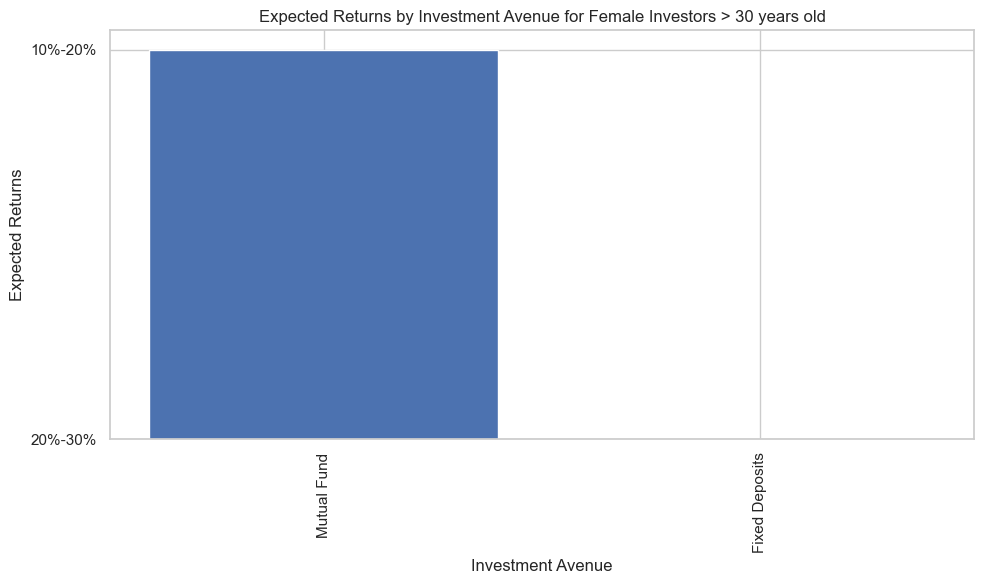

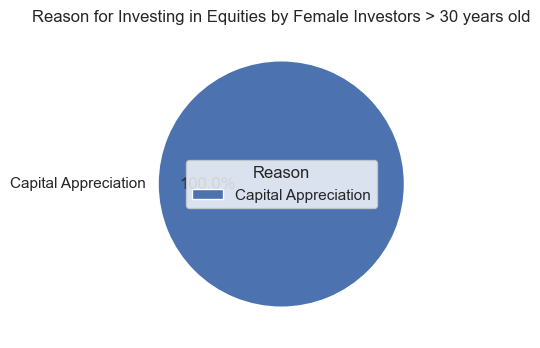

In [17]:
# 1. Prepare the prompt
prompt = f"""
You are a data analyst working with the following pandas dataframe called df:

{df.head(5).to_string(index=False)}

Write the pandas code and a SQL query to return all rows where the age is greater than 30 and gender is female.
Return ONLY the code. First the pandas code, then the SQL query.
Then return pure Python code to visualize the result using matplotlib where the age is greater than 30 and gender is female. — no explanations or text, just valid Python code for plotting.
"""

# 2. Get response from LLM
response = llm.invoke(prompt)

# 3. Function to clean and split the response
def split_code_sections(text):
    import re

    # ✅ Clean markdown code block tags
    text = re.sub(r"```(?:python|sql)?", "", text)
    text = text.replace("```", "").strip()

    # Split at SQL query
    parts = re.split(r"(?i)(?=SELECT\s+\*)", text, maxsplit=1)

    if len(parts) == 2:
        pandas_code = parts[0].strip()
        rest = parts[1].strip()

        # Further split out matplotlib part
        matplotlib_split = re.split(r"(?i)(?=import\s+matplotlib|plt\.)", rest, maxsplit=1)
        if len(matplotlib_split) == 2:
            sql_query = matplotlib_split[0].strip()

            # Remove LLM artifact lines
            matplotlib_code_raw = matplotlib_split[1].strip()
            matplotlib_lines = matplotlib_code_raw.splitlines()
            matplotlib_code = "\n".join(
                line for line in matplotlib_lines if not re.match(r"^\s*(#|Matplotlib|This|First|Assume)", line)
            )
        else:
            sql_query = rest.strip()
            matplotlib_code = None
    else:
        pandas_code = text.strip()
        sql_query = None
        matplotlib_code = None

    return pandas_code, sql_query, matplotlib_code



# 4. Clean and split
pandas_code, sql_query, matplotlib_code = split_code_sections(response)

# 5. Print all sections
print("Python (Pandas) Code:\n", pandas_code)
print("\nSQL Query:\n", sql_query)
print("\nMatplotlib Code:\n", matplotlib_code)

# 6. Execute the Pandas code and plot
try:
    import re
    import matplotlib.pyplot as plt
    local_vars = {'df': df}

    # Run pandas code
    if re.search(r"\w+\s*=", pandas_code):  # If it's an assignment
        exec(pandas_code, {}, local_vars)
        # Find the newly created DataFrame (not 'df')
        result_var_name = [var for var in local_vars if isinstance(local_vars[var], pd.DataFrame) and var != 'df']
        if result_var_name:
            result = local_vars[result_var_name[0]]
        else:
            raise ValueError("No filtered DataFrame found.")

    # Display result
    display(result)

    # Run matplotlib code
    if matplotlib_code:
        local_vars.update({'plt': plt})
        exec(matplotlib_code, {}, local_vars)

except Exception as e:
    print("Error during code execution:", e)




### seaborn

Python (Pandas) Code:
 import pandas as pd

result = df[(df['gender'] == 'Female') & (df['age'] > 30)]
print(result)

SQL Query:
 SELECT *
FROM table_name
WHERE gender = "Female" AND age > 30;

Seaborn Code:
 import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
result.plot(kind='bar', x='gender', y='age')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

sns.set()
result.groupby(['gender'])['age'].mean().plot(kind='bar')
plt.title('Mean Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Age')
plt.show()

sns.set()
sns.scatterplot(x=result[result['age'] > 30]['age'], y=result[result['age'] > 30]['Investment_Avenues'])
plt.title('Age vs Investment Avenues for Females over 30')
plt.xlabel('Age')
plt.ylabel('Investment Avenues')
plt.show()
    gender  age Investment_Avenues  Mutual_Funds  Equity_Market  Debentures  \
0   Female   34                Yes             1              2           5   
10  Female   35          

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
10,Female,35,Yes,2,4,7,5,3,1,6,...,3-5 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Financial Consultants
25,Female,32,Yes,3,4,7,5,1,2,6,...,3-5 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Fixed Returns,Financial Consultants
29,Female,34,Yes,5,4,3,2,7,1,6,...,3-5 years,Monthly,10%-20%,Mutual Fund,Retirement Plan,Capital Appreciation,Tax Benefits,Safe Investment,Fixed Returns,Newspapers and Magazines
31,Female,31,Yes,2,4,7,6,3,1,5,...,3-5 years,Monthly,20%-30%,Fixed Deposits,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Fixed Returns,Financial Consultants


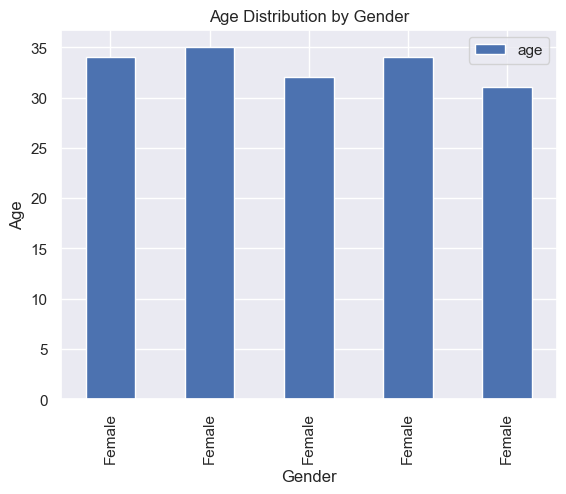

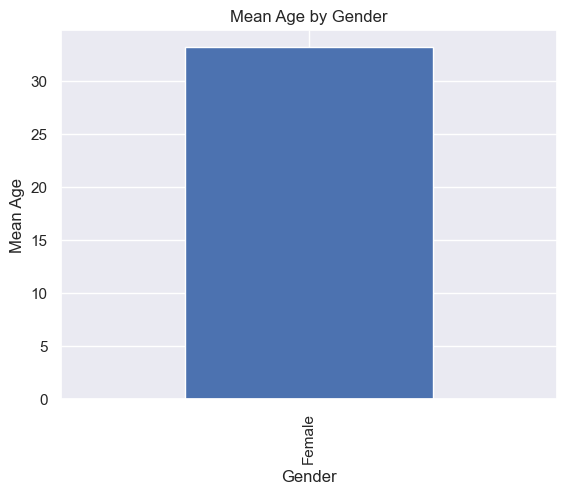

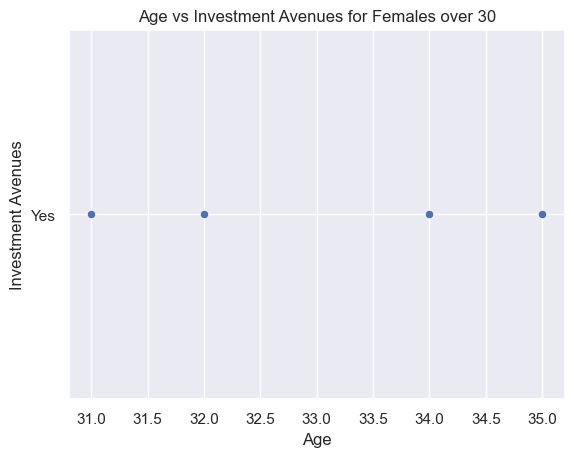

In [20]:
# 1. Prompt
prompt = f"""
You are a data analyst working with the following pandas dataframe called `df`:

{df.head(5).to_string(index=False)}

Write the pandas code and a SQL query to return all rows where the age is greater than 30 and gender is female.
Return ONLY the code. First the pandas code, then the SQL query.
Then return pure Python code to visualize the result using seaborn where the age is greater than 30 and gender is female — no explanations or text, just valid Python code for plotting.
"""

# 2. Get response from LLM
response = llm.invoke(prompt)

# 3. Function to clean and split the response
def split_code_sections(text):
    import re

    # Remove markdown/code artifacts
    text = re.sub(r"```(?:python|sql)?", "", text)
    text = text.replace("```", "").replace("**", "").strip()

    # Clean LLM artifacts
    cleaned_lines = []
    for line in text.splitlines():
        if re.match(r"^\s*(#|--|SQL Query|Seaborn Code|Matplotlib Code)", line):
            continue
        if 'sql_query' in line:
            continue
        cleaned_lines.append(line)

    cleaned_text = "\n".join(cleaned_lines)

    # Extract SQL query
    sql_match = re.search(r"SELECT\s+\*\s+FROM\s+.*?;", cleaned_text, re.IGNORECASE | re.DOTALL)
    sql_query = sql_match.group(0).strip() if sql_match else None

    # Remove SQL from text to isolate pandas + seaborn
    if sql_query:
        cleaned_text = cleaned_text.replace(sql_query, "")

    # Split Seaborn
    parts = re.split(r"(?i)(?=import\s+seaborn|sns\.)", cleaned_text, maxsplit=1)
    if len(parts) == 2:
        pandas_code = parts[0].strip()
        seaborn_code = "import seaborn\n" + parts[1].strip()
    else:
        pandas_code = cleaned_text.strip()
        seaborn_code = None

    return pandas_code, sql_query, seaborn_code


# 4. Clean and split
pandas_code, sql_query, seaborn_code = split_code_sections(response)

# 5. Print all sections
print("Python (Pandas) Code:\n", pandas_code)
print("\nSQL Query:\n", sql_query)
print("\nSeaborn Code:\n", seaborn_code)

# 6. Execute code
try:
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    import re

    local_vars = {'df': df, 'sns': sns, 'plt': plt}

    # Execute pandas code
    if re.search(r"\w+\s*=", pandas_code):
        exec(pandas_code, {}, local_vars)
        result_var_name = [var for var in local_vars if isinstance(local_vars[var], pd.DataFrame) and var != 'df']
        result = local_vars[result_var_name[0]] if result_var_name else None
    else:
        result = eval(pandas_code, local_vars)

    # Display result
    display(result)

    # Execute seaborn code
    if seaborn_code:
        local_vars.update({'result': result})
        exec(seaborn_code, {}, local_vars)

except Exception as e:
    print("Error during code execution:", e)


In [5]:
# 1. Prepare the prompt
prompt = f"""
You are a data analyst working with the following pandas dataframe called `df`:

{df.head(5).to_string(index=False)}

Write the pandas code and a SQL query to return all rows where the age is greater than 30.
Return ONLY the code. First the pandas code, then the SQL query.
"""

# 2. Get response from LLM
response = llm.invoke(prompt)

# 3. Function to clean and split the response
def split_code_sections(text):
    import re

    # Remove markdown code block markers
    text = re.sub(r"```(?:python|sql)?", "", text)
    text = text.replace("```", "").strip()

    # Split at SQL query
    sections = re.split(r"(?i)(?=SELECT\s+\*)", text, maxsplit=1)

    if len(sections) == 2:
        pandas_code = sections[0].strip()
        sql_query = sections[1].strip()
    else:
        pandas_code = text.strip()
        sql_query = None

    return pandas_code, sql_query

# 4. Clean and split
pandas_code, sql_query = split_code_sections(response)

# 5. Print both sections
print("Python (Pandas) Code:\n", pandas_code)
print("\nSQL Query:\n", sql_query)

try:
    import re
    local_vars = {'df': df}

    if re.search(r"\w+\s*=", pandas_code):  # If it's an assignment
        exec(pandas_code, {}, local_vars)
        result_var_name = [var for var in local_vars if var.startswith("df_")][0]
        result = local_vars[result_var_name]
    else:  # It's an expression
        result = eval(pandas_code, local_vars)

    display(result)

except Exception as e:
    print("Error during code execution:", e)



Python (Pandas) Code:
 df_filtered = df[df['age'] > 30]

SQL Query:
 SELECT * FROM table_name WHERE age > 30;


,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
8,Male,35,Yes,2,4,7,5,3,1,6,...,1-3 years,Weekly,20%-30%,Equity,Retirement Plan,Capital Appreciation,Fund Diversification,Safe Investment,Fixed Returns,Television
9,Male,31,Yes,1,3,7,4,5,2,6,...,3-5 years,Monthly,30%-40%,Fixed Deposits,Retirement Plan,Capital Appreciation,Fund Diversification,Assured Returns,Fixed Returns,Newspapers and Magazines
10,Female,35,Yes,2,4,7,5,3,1,6,...,3-5 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Financial Consultants
25,Female,32,Yes,3,4,7,5,1,2,6,...,3-5 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Fixed Returns,Financial Consultants
27,Male,31,Yes,2,3,7,6,4,1,5,...,1-3 years,Monthly,20%-30%,Fixed Deposits,Health Care,Capital Appreciation,Fund Diversification,Safe Investment,Fixed Returns,Television
29,Female,34,Yes,5,4,3,2,7,1,6,...,3-5 years,Monthly,10%-20%,Mutual Fund,Retirement Plan,Capital Appreciation,Tax Benefits,Safe Investment,Fixed Returns,Newspapers and Magazines
31,Female,31,Yes,2,4,7,6,3,1,5,...,3-5 years,Monthly,20%-30%,Fixed Deposits,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Fixed Returns,Financial Consultants
38,Male,31,Yes,2,4,7,5,3,1,6,...,1-3 years,Weekly,20%-30%,Equity,Health Care,Dividend,Fund Diversification,Assured Returns,Fixed Returns,Newspapers and Magazines


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def auto_plot(df):
    numeric_cols = df.select_dtypes(include='number').columns
    for col in numeric_cols:
        plt.figure()
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()


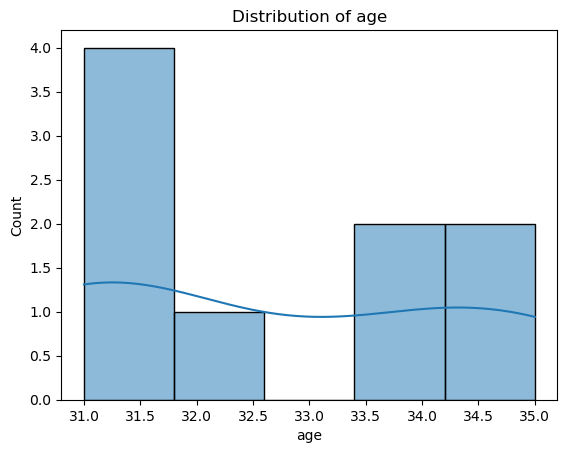

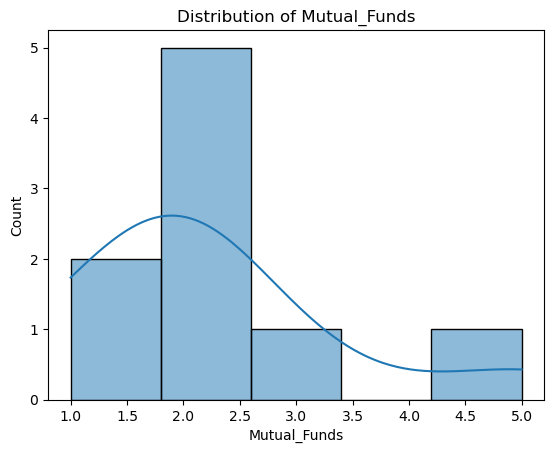

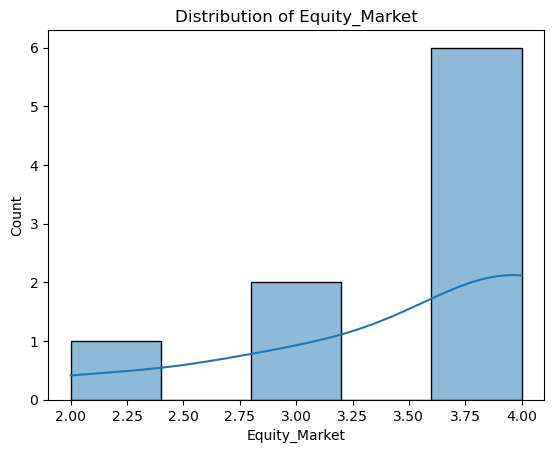

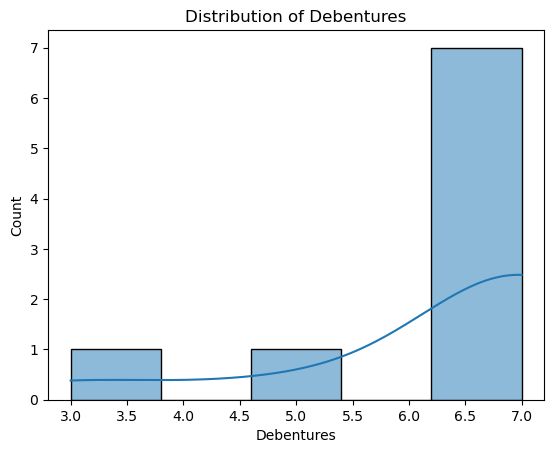

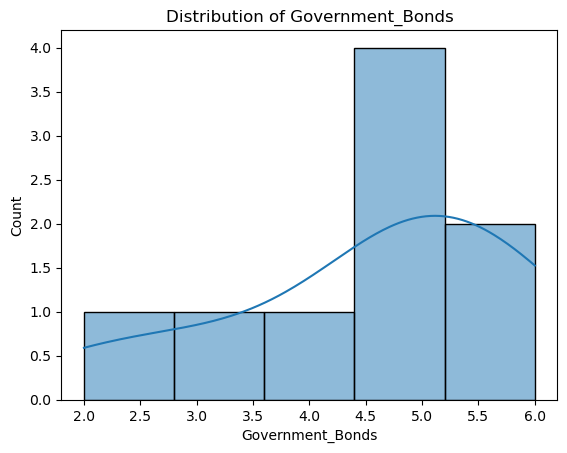

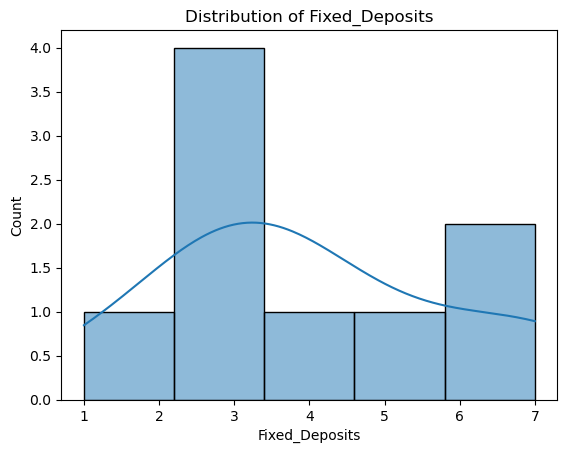

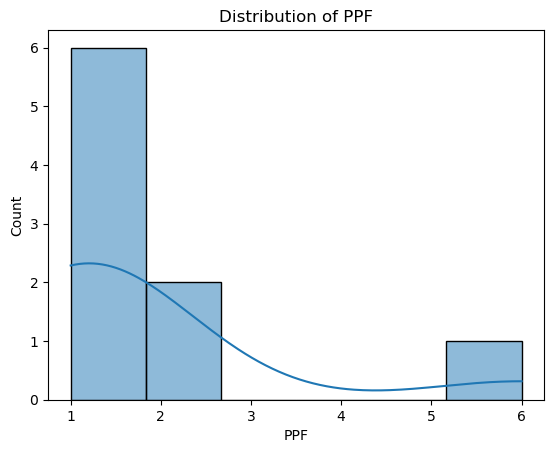

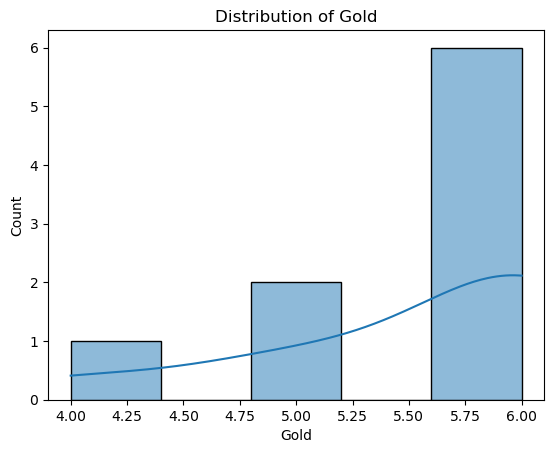

In [7]:
auto_plot(result)

In [15]:
# Prompt for code
prompt = f"""
You are a data analyst working with the following pandas dataframe called `df`:

{df.head(5).to_string(index=False)}

Write the pandas  code and a sql query to return all rows where the age is greater than 30.
Return ONLY the code, nothing else.
"""

# Get the LLM's response
response = llm.invoke(prompt)
print("Raw Generated Code:\n", response)

# Clean the response
def extract_code(text):
    import re
    code = re.sub(r"```(?:python)?", "", text)
    code = code.replace("```", "").strip()
    return code

cleaned_code = extract_code(response)
print("Cleaned Code:\n", cleaned_code)

# Evaluate the cleaned code
result = eval(cleaned_code)
display(result)



Raw Generated Code:
 **Pandas Code:**
```python
df_filtered = df[df['age'] > 30]
```

**SQL Query:**
```sql
SELECT *
FROM df
WHERE age > 30;
```
Cleaned Code:
 **Pandas Code:**

df_filtered = df[df['age'] > 30]


**SQL Query:**
sql
SELECT *
FROM df
WHERE age > 30;


SyntaxError: invalid syntax (<string>, line 1)

In [ ]:
# Prompt for code
prompt = f"""
You are a data analyst working with the following pandas dataframe called `df`:

{df.head(5).to_string(index=False)}

Write the pandas code to return all rows where the age is greater than 30 and "Reason_Mutual" column has value "Better Returns".
Return ONLY the code, nothing else.
"""

# Get the LLM's response
response = llm.invoke(prompt)
print("Raw Generated Code:\n", response)

# Clean the response
def extract_code(text):
    import re
    code = re.sub(r"```(?:python)?", "", text)
    code = code.replace("```", "").strip()
    return code

cleaned_code = extract_code(response)
print("Cleaned Code:\n", cleaned_code)


# Evaluate the cleaned code
result = eval(cleaned_code)
display(result)



Raw Generated Code:
 ```python
df[(df['age'] > 30) & (df['Reason_Mutual'] == 'Better Returns')]
```
Cleaned Code:
 df[(df['age'] > 30) & (df['Reason_Mutual'] == 'Better Returns')]


,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
10,Female,35,Yes,2,4,7,5,3,1,6,...,3-5 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Financial Consultants
25,Female,32,Yes,3,4,7,5,1,2,6,...,3-5 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Fixed Returns,Financial Consultants
31,Female,31,Yes,2,4,7,6,3,1,5,...,3-5 years,Monthly,20%-30%,Fixed Deposits,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Fixed Returns,Financial Consultants
